<a href="https://colab.research.google.com/github/daffamilliano/covid-19-with-linear-regression/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDIKSI PASIEN SEMBUH COVID-19 DKI JAKARTA 2020/2021 DARI KASUS BARU**

Tahapan dalam penggunaan Simple Linear Regression di analis kali ini adalah sebagai berikut:
1. Load library python
2. Load dataset
3. Sneak peak data
4. Handling missing values
5. Exploratory Data Analysis (EDA)
6. Modelling
7. Prediction


Memuat beberapa library python yang akan digunakan dalam tutorial ini. Library tersebut adalah:

Dataset from https://www.kaggle.com/datasets/hendratno/covid19-indonesia

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

- Module LinearRegression digunakan untuk memanggil algoritma Linear Regression.
- Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/covid_19_2020-2021.csv", delimiter=",")

Memuat dataset yang akan digunakan menggunakan library pandas dengan function read_csv (karena file kita extensionya csv).

In [ ]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


Menampilkan 5 Data teratas

Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.

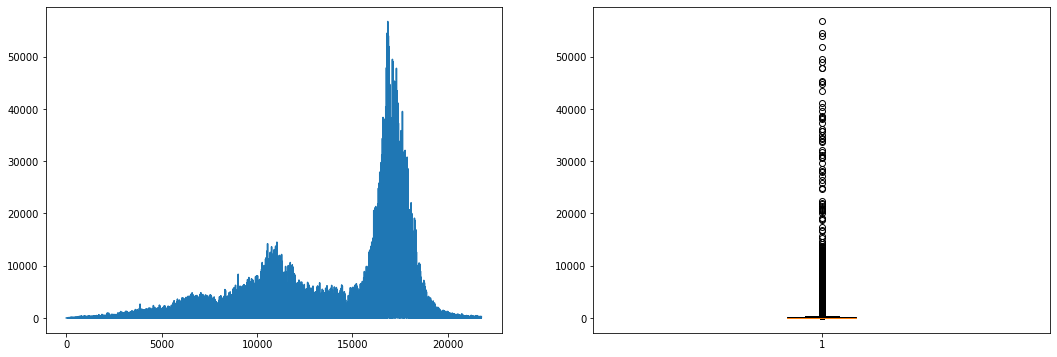

In [ ]:
f = plt.figure(figsize=(18,6))
f.add_subplot(1,2,1)
df['New Cases'].plot()
f.add_subplot(1,2,2)
plt.boxplot(df['New Cases'])
plt.show()

- Dapat dilihat bahwa mean dan median dari new case terpusat di sekitar nilai 18000.
- Terdapat outliers data yang bisa dilihat di boxplot.

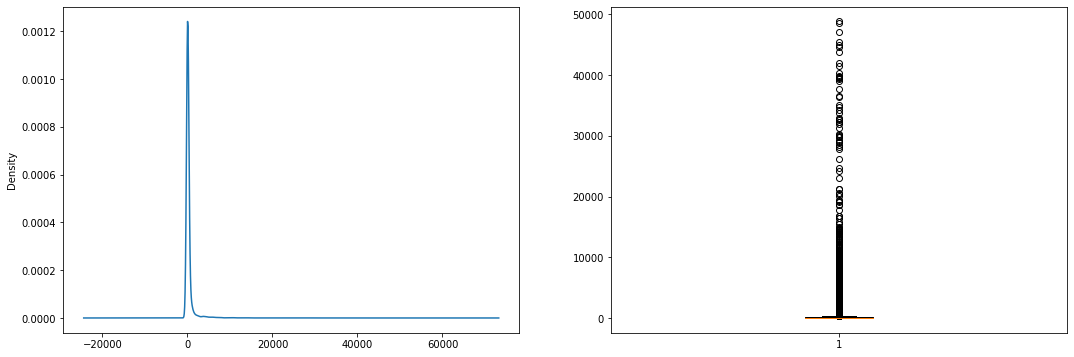

In [ ]:
f = plt.figure(figsize=(18,6))
f.add_subplot(1,2,1)
df['New Recovered'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['New Recovered'])
plt.show()

- Data pasien sembuh per hari nya tidak melebihi 12
- Terdapat ouliers di boxplot

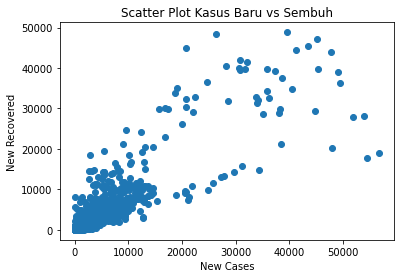

In [ ]:
plt.scatter(df['New Cases'], df['New Recovered'])
plt.xlabel('New Cases')
plt.ylabel('New Recovered')
plt.title('Scatter Plot Kasus Baru vs Sembuh')
plt.show()

- Dari scatter plot dapat dilihat secara kasat mata bahwa data memiliki korelasi positif yang cukup signifikan.
- Semakin banyak kasus baru, semakin banyak juga yang sembuh

In [ ]:
df.corr()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.883605,0.896256,0.229723,0.558409,0.488417,0.510819,0.950248,NaN,0.523871,...,0.086446,-0.034006,-0.011089,0.259510,0.099134,0.194049,0.087315,0.087316,-0.014790,0.012854
New Deaths,0.883605,1.000000,0.937687,-0.125791,0.591411,0.552839,0.546664,0.921230,NaN,0.485562,...,0.026684,-0.027656,-0.017851,0.161118,0.078218,0.251614,0.108763,0.108763,-0.018176,0.046331
New Recovered,0.896256,0.937687,1.000000,-0.225616,0.630925,0.569523,0.587108,0.942956,NaN,0.524084,...,0.088663,-0.034277,-0.010781,0.222793,0.125728,0.218035,0.118252,0.118252,-0.019808,0.032844
New Active Cases,0.229723,-0.125791,-0.225616,1.000000,-0.157961,-0.178774,-0.166191,0.016914,NaN,0.002116,...,0.000057,0.000095,-0.000095,0.086073,-0.055125,-0.056066,-0.067831,-0.067829,0.010986,-0.045345
Total Cases,0.558409,0.591411,0.630925,-0.157961,1.000000,0.976603,0.998137,0.626905,NaN,0.643426,...,0.120403,-0.040542,-0.014804,0.078737,0.244949,0.084103,0.253404,0.253403,-0.024467,0.008283
Total Deaths,0.488417,0.552839,0.569523,-0.178774,0.976603,1.000000,0.977517,0.558637,NaN,0.629733,...,0.050208,-0.035093,-0.025741,0.039090,0.175851,0.075242,0.250882,0.250881,-0.024392,0.008072
Total Recovered,0.510819,0.546664,0.587108,-0.166191,0.998137,0.977517,1.000000,0.578521,NaN,0.626074,...,0.124840,-0.040750,-0.014696,0.068243,0.252471,0.073867,0.259113,0.259111,-0.023842,0.007389
Total Active Cases,0.950248,0.921230,0.942956,0.016914,0.626905,0.558637,0.578521,1.000000,NaN,0.602601,...,0.046657,-0.023833,-0.005454,0.193540,0.081983,0.180361,0.080950,0.080950,-0.022270,0.016050
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.523871,0.485562,0.524084,0.002116,0.643426,0.629733,0.626074,0.602601,NaN,1.000000,...,-0.064255,0.012867,0.072831,-0.029880,-0.038491,-0.010568,-0.011962,-0.011963,-0.021564,0.004815


Setelah kita mengetahui karakteristik dari data kita, maka tahapan selanjutnya adalah Modelling.

In [ ]:
x = df['New Cases'].values.reshape(-1,1)
y = df['New Recovered'].values.reshape(-1,1)

kita split data kita menjadi training and testing dengan porsi 80:20.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
lin_reg = LinearRegression()

training the model menggunakan training data yang sudah displit sebelumnya.

In [ ]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.87279788]]
[39.68161622]


- nilai m dan b nya

kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya.

In [ ]:
lin_reg.score(x_test, y_test)

0.8490638628583962

Model kita mendapatkan accuracy score sebesar 84.90%

visualisasi Regression Line menggunakan data testing.

Text(0.5, 1.0, 'Plot Kasus Baru vs Sembuh')

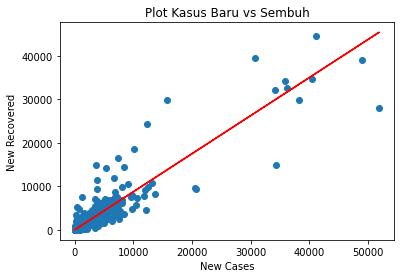

In [ ]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('New Cases')
plt.ylabel('New Recovered')
plt.title('Plot Kasus Baru vs Sembuh')

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

In [ ]:
lin_reg.predict([[20]])

array([[57.1375738]])

Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prediksi dari pasien sembuh dengan 20 kasus baru kira2 sekitar 57